In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings  
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('sgemm_product.csv')

In [5]:
display(df.head())

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [4]:
display(df.columns)

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'Run1 (ms)', 'Run2 (ms)',
       'Run3 (ms)', 'Run4 (ms)'],
      dtype='object')

In [7]:
display(df.isna().sum())

MWG          0
NWG          0
KWG          0
MDIMC        0
NDIMC        0
MDIMA        0
NDIMB        0
KWI          0
VWM          0
VWN          0
STRM         0
STRN         0
SA           0
SB           0
Run1 (ms)    0
Run2 (ms)    0
Run3 (ms)    0
Run4 (ms)    0
dtype: int64

In [8]:
df['Run'] = (df['Run1 (ms)'] + df['Run2 (ms)'] + df['Run3 (ms)'] + df['Run4 (ms)'] )/4
data = df.copy()

In [9]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),Run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81,118.6625


In [10]:
df["Binary_Run"] = (df["Run"] >= df["Run"].median()).astype(int)
df["Binary_Run"].value_counts()

1    120801
0    120799
Name: Binary_Run, dtype: int64

In [11]:
df = df.drop(['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)','Run'],axis=1)
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Binary_Run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,1
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,1
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,1
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,1
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,1


In [12]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

print(X.shape, y.shape)

(241600, 14) (241600,)


In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [15]:
y_train.shape[0]

169120

In [16]:
X_train.shape[0]

169120

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [18]:
# Initialising the ANN
classifier = Sequential()
classifier_tanh = Sequential()
classifier_softmax = Sequential()

In [19]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 14))
classifier_tanh.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'tanh', input_dim = 14))
classifier_softmax.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'softmax', input_dim = 14))


Instructions for updating:
Colocations handled automatically by placer.


In [20]:
#Relu 
# Adding the second hidden layer
classifier.add(Dense(units = 11, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [21]:
#tanh
# Adding the second hidden layer
classifier_tanh.add(Dense(units = 11, kernel_initializer = 'uniform', activation = 'tanh'))
# Adding the output layer
classifier_tanh.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [22]:
#softmax
# Adding the second hidden layer
classifier_softmax.add(Dense(units = 11, kernel_initializer = 'uniform', activation = 'softmax'))
# Adding the output layer
classifier_softmax.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [23]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier_tanh.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier_softmax.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [24]:
#Relu activation function Model fit
classifier_fit = classifier.fit(X_train, y_train,validation_data=(X_test,y_test), batch_size = 128, epochs = 100)

Instructions for updating:
Use tf.cast instead.
Train on 169120 samples, validate on 72480 samples
Epoch 1/100
169120/169120 [==============================] - 5s 31us/step - loss: 0.3512 - accuracy: 0.8567 - val_loss: 0.2432 - val_accuracy: 0.9041
Epoch 2/100
169120/169120 [==============================] - 5s 31us/step - loss: 0.2207 - accuracy: 0.9134 - val_loss: 0.2013 - val_accuracy: 0.9198
Epoch 3/100
169120/169120 [==============================] - 6s 37us/step - loss: 0.1918 - accuracy: 0.9224 - val_loss: 0.1822 - val_accuracy: 0.9261
Epoch 4/100
169120/169120 [==============================] - 6s 36us/step - loss: 0.1799 - accuracy: 0.9265 - val_loss: 0.1756 - val_accuracy: 0.9270
Epoch 5/100
169120/169120 [==============================] - 6s 33us/step - loss: 0.1750 - accuracy: 0.9276 - val_loss: 0.1715 - val_accuracy: 0.9285
Epoch 6/100
169120/169120 [==============================] - 5s 32us/step - loss: 0.1718 - accuracy: 0.9284 - val_loss: 0.1704 - val_accuracy: 0.9286
E

169120/169120 [==============================] - 5s 32us/step - loss: 0.1236 - accuracy: 0.9498 - val_loss: 0.1206 - val_accuracy: 0.9509
Epoch 54/100
169120/169120 [==============================] - 6s 38us/step - loss: 0.1234 - accuracy: 0.9494 - val_loss: 0.1200 - val_accuracy: 0.9511
Epoch 55/100
169120/169120 [==============================] - 6s 34us/step - loss: 0.1232 - accuracy: 0.9492 - val_loss: 0.1193 - val_accuracy: 0.9515
Epoch 56/100
169120/169120 [==============================] - 6s 35us/step - loss: 0.1228 - accuracy: 0.9498 - val_loss: 0.1224 - val_accuracy: 0.9499
Epoch 57/100
169120/169120 [==============================] - 6s 34us/step - loss: 0.1229 - accuracy: 0.9498 - val_loss: 0.1197 - val_accuracy: 0.9505
Epoch 58/100
169120/169120 [==============================] - 6s 34us/step - loss: 0.1228 - accuracy: 0.9498 - val_loss: 0.1198 - val_accuracy: 0.9510
Epoch 59/100
169120/169120 [==============================] - 6s 33us/step - loss: 0.1223 - accuracy: 0.950

In [33]:
#tanh activation function Model fit
classifier_fit1 = classifier_tanh.fit(X_train, y_train,validation_data=(X_test,y_test), batch_size = 128, epochs = 100)

Train on 169120 samples, validate on 72480 samples
Epoch 1/100
169120/169120 [==============================] - 2s 10us/step - loss: 0.4190 - accuracy: 0.8350 - val_loss: 0.3628 - val_accuracy: 0.8558
Epoch 2/100
169120/169120 [==============================] - 1s 9us/step - loss: 0.3555 - accuracy: 0.8573 - val_loss: 0.3525 - val_accuracy: 0.8579
Epoch 3/100
169120/169120 [==============================] - 1s 9us/step - loss: 0.3504 - accuracy: 0.8578 - val_loss: 0.3484 - val_accuracy: 0.8569
Epoch 4/100
169120/169120 [==============================] - 1s 9us/step - loss: 0.3383 - accuracy: 0.8581 - val_loss: 0.3293 - val_accuracy: 0.8585
Epoch 5/100
169120/169120 [==============================] - 1s 9us/step - loss: 0.3200 - accuracy: 0.8673 - val_loss: 0.3139 - val_accuracy: 0.8742
Epoch 6/100
169120/169120 [==============================] - 2s 9us/step - loss: 0.3053 - accuracy: 0.8809 - val_loss: 0.2979 - val_accuracy: 0.8852
Epoch 7/100
169120/169120 [===========================

169120/169120 [==============================] - 3s 16us/step - loss: 0.1084 - accuracy: 0.9543 - val_loss: 0.1069 - val_accuracy: 0.9556
Epoch 56/100
169120/169120 [==============================] - 3s 16us/step - loss: 0.1076 - accuracy: 0.9546 - val_loss: 0.1071 - val_accuracy: 0.9555
Epoch 57/100
169120/169120 [==============================] - 3s 15us/step - loss: 0.1073 - accuracy: 0.9547 - val_loss: 0.1056 - val_accuracy: 0.9560
Epoch 58/100
169120/169120 [==============================] - 3s 15us/step - loss: 0.1068 - accuracy: 0.9550 - val_loss: 0.1057 - val_accuracy: 0.9564
Epoch 59/100
169120/169120 [==============================] - 3s 16us/step - loss: 0.1065 - accuracy: 0.9555 - val_loss: 0.1049 - val_accuracy: 0.9566
Epoch 60/100
169120/169120 [==============================] - 3s 15us/step - loss: 0.1062 - accuracy: 0.9557 - val_loss: 0.1045 - val_accuracy: 0.9571
Epoch 61/100
169120/169120 [==============================] - 2s 14us/step - loss: 0.1057 - accuracy: 0.955

In [44]:
#softmax activation function Model fit
classifier_fit2 = classifier_softmax.fit(X_train, y_train,validation_data=(X_test,y_test), batch_size = 128, epochs = 100)

Train on 169120 samples, validate on 72480 samples
Epoch 1/100
169120/169120 [==============================] - 1s 9us/step - loss: 0.0985 - accuracy: 0.9588 - val_loss: 0.0972 - val_accuracy: 0.9600
Epoch 2/100
169120/169120 [==============================] - 1s 8us/step - loss: 0.0984 - accuracy: 0.9590 - val_loss: 0.0966 - val_accuracy: 0.9603
Epoch 3/100
169120/169120 [==============================] - 1s 9us/step - loss: 0.0983 - accuracy: 0.9589 - val_loss: 0.0958 - val_accuracy: 0.9607
Epoch 4/100
169120/169120 [==============================] - 1s 8us/step - loss: 0.0982 - accuracy: 0.9588 - val_loss: 0.0976 - val_accuracy: 0.9588
Epoch 5/100
169120/169120 [==============================] - 1s 8us/step - loss: 0.0980 - accuracy: 0.9589 - val_loss: 0.0959 - val_accuracy: 0.9606
Epoch 6/100
169120/169120 [==============================] - 1s 9us/step - loss: 0.0977 - accuracy: 0.9588 - val_loss: 0.0964 - val_accuracy: 0.9608
Epoch 7/100
169120/169120 [============================

169120/169120 [==============================] - 2s 13us/step - loss: 0.0942 - accuracy: 0.9611 - val_loss: 0.0922 - val_accuracy: 0.9624
Epoch 56/100
169120/169120 [==============================] - 2s 13us/step - loss: 0.0940 - accuracy: 0.9613 - val_loss: 0.0922 - val_accuracy: 0.9631
Epoch 57/100
169120/169120 [==============================] - 2s 13us/step - loss: 0.0940 - accuracy: 0.9611 - val_loss: 0.0925 - val_accuracy: 0.9628
Epoch 58/100
169120/169120 [==============================] - 2s 13us/step - loss: 0.0941 - accuracy: 0.9614 - val_loss: 0.0926 - val_accuracy: 0.9623
Epoch 59/100
169120/169120 [==============================] - 2s 13us/step - loss: 0.0940 - accuracy: 0.9613 - val_loss: 0.0928 - val_accuracy: 0.9625
Epoch 60/100
169120/169120 [==============================] - 2s 13us/step - loss: 0.0940 - accuracy: 0.9617 - val_loss: 0.0926 - val_accuracy: 0.9623
Epoch 61/100
169120/169120 [==============================] - 2s 13us/step - loss: 0.0938 - accuracy: 0.961

In [21]:
#classifier.fit(X_train, y_train, batch_size = 128, epochs = 100)

In [21]:
# list all data in history
print(classifier_fit.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


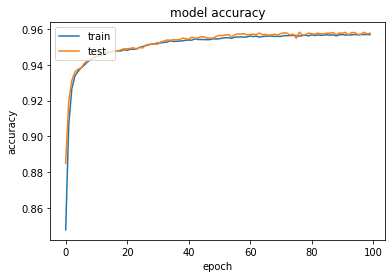

In [22]:
# summarize history for accuracy
plt.plot(classifier_fit.history['accuracy'])
plt.plot(classifier_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

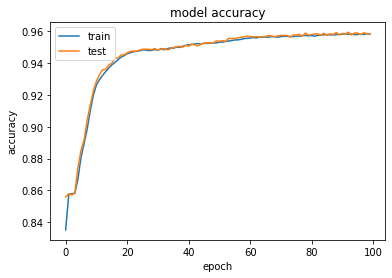

In [35]:
# summarize history for accuracy
plt.plot(classifier_fit1.history['accuracy'])
plt.plot(classifier_fit1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

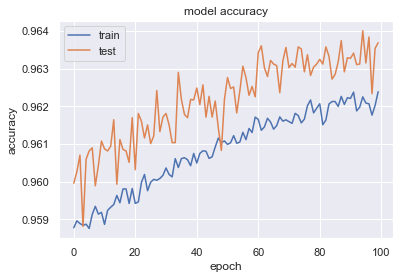

In [45]:
# summarize history for accuracy
plt.plot(classifier_fit2.history['accuracy'])
plt.plot(classifier_fit2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [33]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)

In [34]:
print(cm)

[[35116  1010]
 [ 2361 33993]]


[[35116  1010]
 [ 2361 33993]]


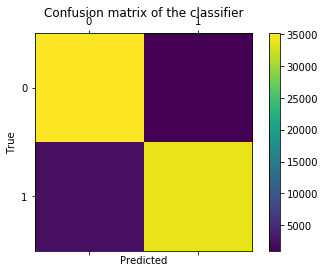

In [38]:
from sklearn.metrics import confusion_matrix

labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [49]:
target_names = ['0', '1']
print(classification_report(y_test, y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     36126
           1       0.97      0.96      0.96     36354

    accuracy                           0.96     72480
   macro avg       0.96      0.96      0.96     72480
weighted avg       0.96      0.96      0.96     72480



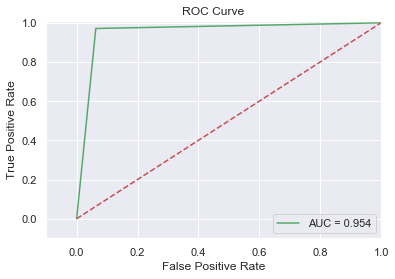

In [45]:
from sklearn.metrics import roc_curve,auc
def roc_auc(y_test,y_pred1):
    sns.set()
    fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
    roc_auc = auc(fpr,tpr)
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, 'g',label='AUC = %0.3f'% roc_auc)
    plt.legend()
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
roc_auc(y_pred,y_test)

#  KNN Algorithm

In [159]:
from sklearn.neighbors import KNeighborsClassifier
KNNclassifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNNclassifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [160]:
# Predicting the Test set results
y_pred1 = KNNclassifier.predict(X_test)

In [199]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred1)
accuracy = accuracy_score(y_test, y_pred1)
print(cm)
print(accuracy)

[[35032  1094]
 [ 2935 33419]]
0.9444122516556291


In [200]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     36126
           1       0.97      0.92      0.94     36354

    accuracy                           0.94     72480
   macro avg       0.95      0.94      0.94     72480
weighted avg       0.95      0.94      0.94     72480



Text(0, 0.5, 'Mean Error')

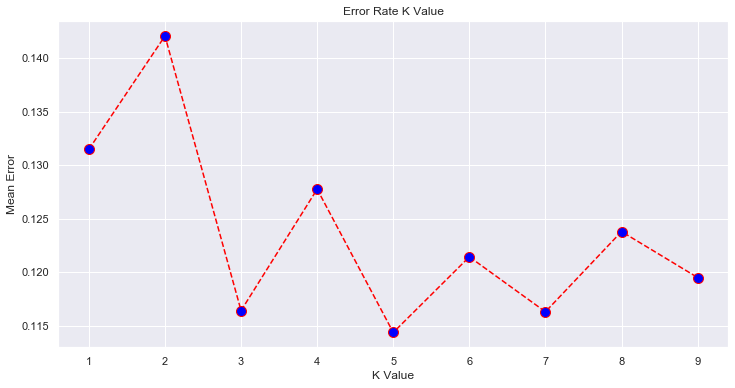

In [201]:
error = []

# Calculating error for K values 
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

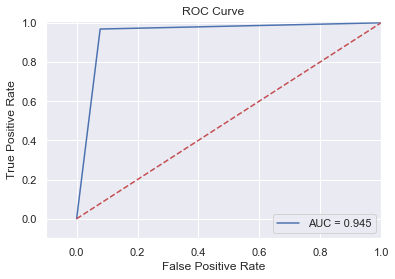

In [202]:
from sklearn.metrics import roc_curve,auc
def roc_auc(y_test,y_pred1):
    sns.set()
    fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
    roc_auc = auc(fpr,tpr)
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
    plt.legend()
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
roc_auc(y_pred1,y_test)

# Cross-Validation for KNN

In [163]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNNclassifier,X_train, y_train, cv=5, scoring='accuracy')
# print all 5 times scores 
print(scores)
print(scores.mean())

[0.93581481 0.9332131  0.93528264 0.92863056 0.93492786]
0.9335737937559131


# Cross Validation for Neural Networks

In [51]:
df1 = df.copy()
df1.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Binary_Run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,1
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,1
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,1
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,1
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,1


In [52]:
X1 = df.iloc[:,:-1]
y1 = df.iloc[:,-1]

print(X1.shape[0], y1.shape[0])

241600 241600


In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1 = sc.fit_transform(X1)
X1 = pd.DataFrame(X1)

In [54]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn import metrics

# Cross-Validate
kf = KFold(5, shuffle=True, random_state=42) # Use for KFold classification
    
oos_y = []
oos_pred = []
fold_score = []
fold = 0
for train, test in kf.split(X1):
    fold+=1
    print(f"Fold #{fold}")
        
    x_train = X1.values[train]
    y_train = y1.values[train]
    x_test = X1.values[test]
    y_test = y1.values[test]
    
    model = Sequential()
    model.add(Dense(10, input_dim=X1.shape[1],kernel_initializer = 'uniform', activation='softmax'))
    model.add(Dense(units = 11, kernel_initializer = 'uniform', activation = 'softmax'))
    model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size = 128,verbose=0,epochs=50)
    
    pred = model.predict(x_test)
    #y_pred = classifier.predict(X_test)
    pred = (pred > 0.5)
    oos_y.append(y_test)
    oos_pred.append(pred)    

    # Measure this fold's Accuracy
    score = metrics.accuracy_score(pred,y_test)
    fold_score.append(score)
    print(f"Fold score (Accuracy): {score}")
# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.mean(metrics.accuracy_score(oos_pred,oos_y))
print(f"Final, out of sample score (Accuracy): {score}")  
Final_Kfoldscore = np.mean(fold_score)  
print("Accuracy of K-Fold Score: {Final_Kfoldscore}")
    
# Write the cross-validated prediction
oos_y = pd.DataFrame(oos_y)
oos_pred = pd.DataFrame(oos_pred)
oosDF = pd.concat( [df, oos_y, oos_pred],axis=1 )

Fold #1
Fold score (Accuracy): 0.960989238410596
Fold #2
Fold score (Accuracy): 0.9548634105960265
Fold #3
Fold score (Accuracy): 0.9593956953642384
Fold #4
Fold score (Accuracy): 0.9466680463576159
Fold #5
Fold score (Accuracy): 0.9555049668874173
Final, out of sample score (Accuracy): 0.9554842715231788
Accuracy of K-Fold Score: {Final_Kfoldscore}
